[*********************100%***********************]  1 of 1 completed


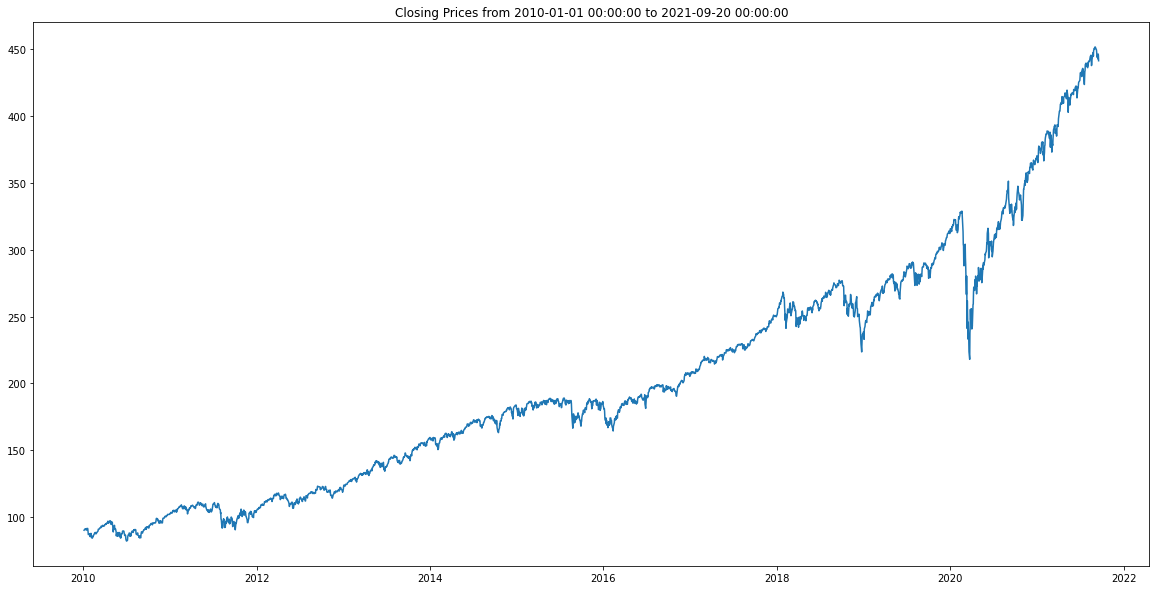

In [1]:
# import modules
import talib
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
  
# initialize parameters
start_date = datetime(2010, 1, 1)
test_date = datetime(2009, 1, 1)
end_date = datetime(2021, 9, 20)
  
# get the data
#data = yf.download('SPY', start = start_date,
                   #end = end_date)

spy = yf.Ticker("SPY")
data = spy.history(start = start_date,
                   end = end_date)  

data2 = yf.download('SPY', start = test_date,
                   end = end_date)
  
# display
plt.figure(figsize = (20,10))
plt.title('Closing Prices from {} to {}'.format(start_date,
                                                end_date))
plt.plot(data['Close'])
plt.show()

In [2]:
#print(data["Close"])

#data = pd.DataFrame(data["Close"])

data = pd.DataFrame(data)

#data = data.drop('Open',axis=1)
data = data.drop('High',axis=1)
data = data.drop('Low',axis=1)
data = data.drop('Dividends',axis=1)
data = data.drop('Stock Splits',axis=1)

print(data)

                  Open       Close     Volume
Date                                         
2010-01-04   89.440906   90.205017  118944600
2010-01-05   90.149304   90.443802  111579900
2010-01-06   90.356267   90.507500  116074400
2010-01-07   90.340311   90.889519  131091100
2010-01-08   90.650740   91.191986  126402800
...                ...         ...        ...
2021-09-13  447.207319  445.153870   83738600
2021-09-14  446.688955  442.751587   78197100
2021-09-15  443.200138  446.449738   78792200
2021-09-16  445.891519  445.742004   77786700
2021-09-17  444.920013  441.399994  118425000

[2948 rows x 3 columns]


In [3]:
rsi = talib.RSI(data2["Open"])

In [4]:
rsi = pd.DataFrame(rsi[252:])
rsi.columns =['RSI']
print(rsi)

                  RSI
Date                 
2010-01-04  56.950130
2010-01-05  61.116103
2010-01-06  62.264915
2010-01-07  62.112916
2010-01-08  63.960749
...               ...
2021-09-13  54.857540
2021-09-14  53.504271
2021-09-15  45.388549
2021-09-16  51.500231
2021-09-17  46.516929

[2948 rows x 1 columns]


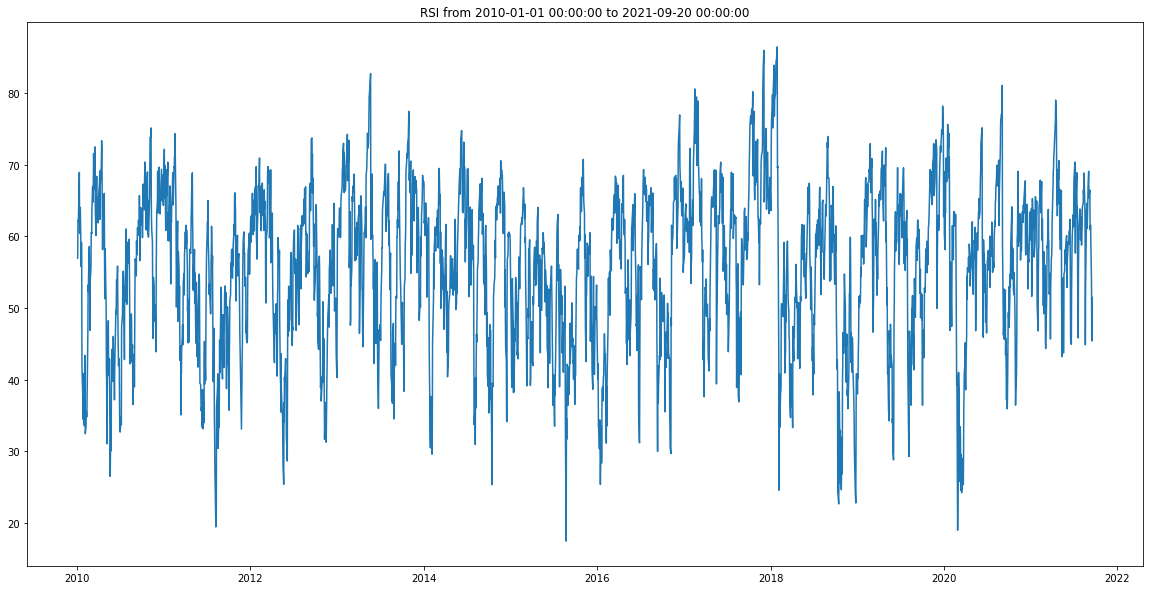

In [5]:
plt.figure(figsize = (20,10))
plt.title('RSI from {} to {}'.format(start_date,
                                                end_date))

plt.plot(rsi)
plt.show()

In [6]:
from functools import reduce

#MACD = talib.MACDFIX(data2["Open"],fastperiod=12, slowperiod=26, signalperiod=10)

MACD = talib.MACDFIX(data2["Open"],signalperiod=10)

MACD_slow = pd.DataFrame(MACD[1])

MACD_slow.columns =['MACD SLOW']


MACD_diff = talib.MACDFIX(data2["Open"],signalperiod=10)

MACD_diff = pd.DataFrame(MACD[2])

MACD_diff.columns =['MACD DIFF']


MACD_fast = talib.MACDFIX(data2["Open"],signalperiod=10)

MACD_fast = pd.DataFrame(MACD[0])

MACD_fast.columns =['MACD FAST']


MACD = [MACD_fast, MACD_slow, MACD_diff]

MACD = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), MACD)

MACD = MACD[252:]

MACD

,MACD FAST,MACD SLOW,MACD DIFF
Date,,,
2010-01-04,0.724449,0.695420,0.029029
2010-01-05,0.763696,0.707834,0.055862
2010-01-06,0.805462,0.725584,0.079877
2010-01-07,0.827739,0.744158,0.083581
2010-01-08,0.865192,0.766164,0.099028
...,...,...,...
2021-09-13,2.881561,3.307467,-0.425906
2021-09-14,2.537126,3.167405,-0.630279
2021-09-15,1.975272,2.950654,-0.975382


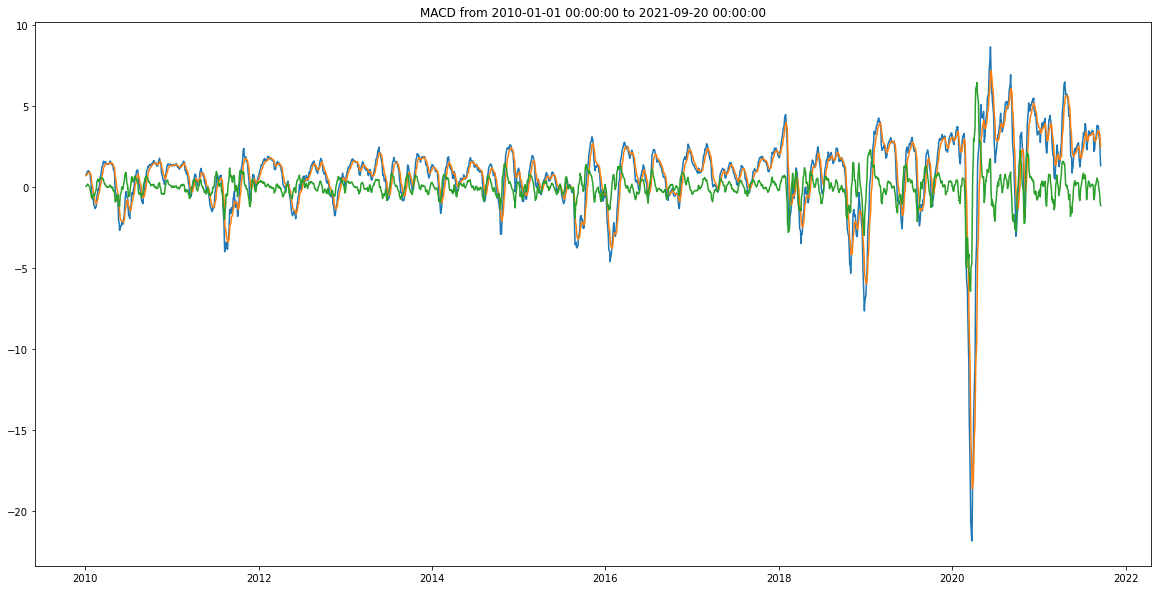

In [7]:
plt.figure(figsize = (20,10))
plt.title('MACD from {} to {}'.format(start_date,
                                                end_date))

plt.plot(MACD)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
EMA12 = talib.EMA(data2["Open"],timeperiod=12)

EMA12 = pd.DataFrame(EMA12[252:])

EMA12.columns =['EMA 12']


SMA12 = talib.SMA(data2["Open"],timeperiod=12)

SMA12 = pd.DataFrame(SMA12[252:])

SMA12.columns =['SMA 12']


WMA12 = talib.WMA(data2['Open'],timeperiod=12)

WMA12 = pd.DataFrame(WMA12[252:])

WMA12.columns =['WMA 12']


EMA26 = talib.EMA(data2["Open"],timeperiod=26)

EMA26 = pd.DataFrame(EMA26[252:])

EMA26.columns =['EMA 26']


SMA26 = talib.SMA(data2["Open"],timeperiod=26)

SMA26 = pd.DataFrame(SMA26[252:])

SMA26.columns =['SMA 26']


WMA26 = talib.WMA(data2['Open'],timeperiod=26)

WMA26 = pd.DataFrame(WMA26[252:])

WMA26.columns =['WMA 26']


EMA50 = talib.EMA(data2["Open"],timeperiod=50)

EMA50 = pd.DataFrame(EMA50[252:])

EMA50.columns =['EMA 50']


SMA50 = talib.SMA(data2["Open"],timeperiod=50)

SMA50 = pd.DataFrame(SMA50[252:])

SMA50.columns =['SMA 50']


WMA50 = talib.WMA(data2['Open'],timeperiod=50)

WMA50 = pd.DataFrame(WMA50[252:])

WMA50.columns =['WMA 50']


EMA200 = talib.EMA(data2["Open"],timeperiod=200)

EMA200 = pd.DataFrame(EMA200[252:])

EMA200.columns =['EMA 200']


SMA200 = talib.SMA(data2["Open"],timeperiod=200)

SMA200 = pd.DataFrame(SMA200[252:])

SMA200.columns =['SMA 200']


WMA200 = talib.WMA(data2['Open'],timeperiod=200)

WMA200 = pd.DataFrame(WMA200[252:])

WMA200.columns =['WMA 200']


KAMA = talib.KAMA(data2["Open"])

KAMA = pd.DataFrame(KAMA[252:])

KAMA.columns =['KAMA']


#MA5 = talib.MA(data2["Open"],timeperiod=5)

#MA5 = pd.DataFrame(MA[252:])

#MA5.columns = ['MA5']

#MA5

EMA = [EMA12, SMA12, WMA12, EMA26, SMA26, WMA26, EMA50, SMA50, WMA50, EMA200, SMA200,WMA200, KAMA]

EMA = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), EMA)


#EMA= pd.DataFrame(pd.merge(EMA12, KAMA,on='Date', how='left'))

#EMA= pd.DataFrame(pd.merge(EMA, MA5,on='Date', how='left'))

EMA

,EMA 12,SMA 12,WMA 12,EMA 26,SMA 26,WMA 26,EMA 50,SMA 50,WMA 50,EMA 200,SMA 200,WMA 200,KAMA
Date,,,,,,,,,,,,,
2010-01-04,112.031259,111.876668,112.225129,111.269721,111.262693,111.671568,109.877581,109.796000,110.847844,98.871174,98.66365,104.038449,108.895070
2010-01-05,112.220297,111.998334,112.437950,111.417149,111.343078,111.819517,110.010225,109.897400,110.983687,99.014346,98.83615,104.183686,108.981591
2010-01-06,112.420250,112.231667,112.672052,111.572916,111.540001,111.980770,110.147863,109.974000,111.125749,99.158681,99.01005,104.329794,109.143139
2010-01-07,112.586366,112.506667,112.867180,111.715663,111.694616,112.125955,110.279319,110.080000,111.264024,99.301381,99.17135,104.473973,109.243047
2010-01-08,112.786925,112.767501,113.080000,111.876725,111.808847,112.288576,110.420915,110.217200,111.413436,99.446541,99.33465,104.620427,109.353766
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13,449.889964,450.889170,451.059879,446.872718,446.938462,448.863907,441.363473,441.451800,445.123907,408.524090,407.51835,422.512453,444.787795
2021-09-14,449.617661,450.848338,450.633852,446.965109,447.170001,448.951427,441.628434,441.780800,445.385405,408.918079,407.94330,422.916450,444.879672
2021-09-15,448.848789,450.640004,449.675645,446.791396,447.253078,448.762538,441.745750,441.997599,445.496746,409.273322,408.34720,423.281392,444.874401


In [10]:
df= pd.DataFrame(pd.merge(rsi, MACD, on='Date', how='left'))

df = pd.merge(df,data, on ='Date',how='left')

df = pd.merge(df,EMA, on ='Date',how='left')

df = df.drop('MACD FAST',axis=1)
df = df.drop('MACD DIFF',axis=1)
df = df.drop('MACD SLOW',axis=1)

df

,RSI,Open,Close,Volume,EMA 12,SMA 12,WMA 12,EMA 26,SMA 26,WMA 26,EMA 50,SMA 50,WMA 50,EMA 200,SMA 200,WMA 200,KAMA
Date,,,,,,,,,,,,,,,,,
2010-01-04,56.950130,89.440906,90.205017,118944600,112.031259,111.876668,112.225129,111.269721,111.262693,111.671568,109.877581,109.796000,110.847844,98.871174,98.66365,104.038449,108.895070
2010-01-05,61.116103,90.149304,90.443802,111579900,112.220297,111.998334,112.437950,111.417149,111.343078,111.819517,110.010225,109.897400,110.983687,99.014346,98.83615,104.183686,108.981591
2010-01-06,62.264915,90.356267,90.507500,116074400,112.420250,112.231667,112.672052,111.572916,111.540001,111.980770,110.147863,109.974000,111.125749,99.158681,99.01005,104.329794,109.143139
2010-01-07,62.112916,90.340311,90.889519,131091100,112.586366,112.506667,112.867180,111.715663,111.694616,112.125955,110.279319,110.080000,111.264024,99.301381,99.17135,104.473973,109.243047
2010-01-08,63.960749,90.650740,91.191986,126402800,112.786925,112.767501,113.080000,111.876725,111.808847,112.288576,110.420915,110.217200,111.413436,99.446541,99.33465,104.620427,109.353766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13,54.857540,447.207319,445.153870,83738600,449.889964,450.889170,451.059879,446.872718,446.938462,448.863907,441.363473,441.451800,445.123907,408.524090,407.51835,422.512453,444.787795
2021-09-14,53.504271,446.688955,442.751587,78197100,449.617661,450.848338,450.633852,446.965109,447.170001,448.951427,441.628434,441.780800,445.385405,408.918079,407.94330,422.916450,444.879672
2021-09-15,45.388549,443.200138,446.449738,78792200,448.848789,450.640004,449.675645,446.791396,447.253078,448.762538,441.745750,441.997599,445.496746,409.273322,408.34720,423.281392,444.874401


In [11]:
#X = df[['RSI','MACD DIFF', 'MACD SLOW','MACD FAST','Volume','EMA 12', 'SMA 12','EMA 26', 'SMA 26', 'EMA 50', 'SMA 50','EMA 200','SMA 200','KAMA','Open']].values

#Best thus far
X = df[[ 'WMA 12','WMA 26','WMA 50','WMA 200','EMA 12', 'SMA 12','EMA 26', 'SMA 26', 'EMA 50', 'SMA 50','EMA 200','SMA 200','KAMA','Open']].values


In [12]:
y = df['Close'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
X_train.shape

(2063, 14)

In [15]:
X_test.shape

(885, 14)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

In [20]:
model = Sequential()

model.add(Dense(14,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(14,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(14,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(14,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(14,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(14,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(14,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

#model.compile(optimizer='rmsprop',loss='mse')

model.compile(optimizer='adam',loss='mse')

In [21]:
from keras.callbacks import History 
history = History()

early_stop = EarlyStopping(monitor = 'val_loss',mode='min',verbose=1,patience=100, restore_best_weights=True)

EarlyStopping()
model.fit(x= X_train,y= y_train,validation_data = (X_test,y_test),batch_size=128,epochs=2000,callbacks=[early_stop])


#model.fit(x=X_train,y=y_train,epochs=200,validation_data = (X_test,y_test))

Epoch 1/2000
17/17 [==============================] - 1s 8ms/step - loss: 48991.9180 - val_loss: 47119.3164
Epoch 2/2000
17/17 [==============================] - 0s 2ms/step - loss: 48664.6914 - val_loss: 46874.3203
Epoch 3/2000
17/17 [==============================] - 0s 2ms/step - loss: 47948.0742 - val_loss: 46062.0625
Epoch 4/2000
17/17 [==============================] - 0s 2ms/step - loss: 45846.4336 - val_loss: 43126.9102
Epoch 5/2000
17/17 [==============================] - 0s 2ms/step - loss: 40880.8477 - val_loss: 34647.0312
Epoch 6/2000
17/17 [==============================] - 0s 2ms/step - loss: 34240.2656 - val_loss: 22683.4434
Epoch 7/2000
17/17 [==============================] - 0s 2ms/step - loss: 30142.8984 - val_loss: 21267.1543
Epoch 8/2000
17/17 [==============================] - 0s 2ms/step - loss: 29716.1250 - val_loss: 21545.6367
Epoch 9/2000
17/17 [==============================] - 0s 2ms/step - loss: 29451.0098 - val_loss: 21093.2676
Epoch 10/2000
17/17 [=======

17/17 [==============================] - 0s 2ms/step - loss: 15138.3018 - val_loss: 9530.9160
Epoch 77/2000
17/17 [==============================] - 0s 2ms/step - loss: 13996.8213 - val_loss: 10650.7676
Epoch 78/2000
17/17 [==============================] - 0s 2ms/step - loss: 14227.8086 - val_loss: 9888.7275
Epoch 79/2000
17/17 [==============================] - 0s 2ms/step - loss: 14438.8232 - val_loss: 9097.1533
Epoch 80/2000
17/17 [==============================] - 0s 2ms/step - loss: 14473.6826 - val_loss: 9431.5059
Epoch 81/2000
17/17 [==============================] - 0s 2ms/step - loss: 14080.2598 - val_loss: 9360.4395
Epoch 82/2000
17/17 [==============================] - 0s 2ms/step - loss: 14716.8242 - val_loss: 9618.7969
Epoch 83/2000
17/17 [==============================] - 0s 2ms/step - loss: 14050.5557 - val_loss: 9389.9346
Epoch 84/2000
17/17 [==============================] - 0s 2ms/step - loss: 13897.6709 - val_loss: 9041.5117
Epoch 85/2000
17/17 [====================

17/17 [==============================] - 0s 2ms/step - loss: 12764.0557 - val_loss: 8028.5659
Epoch 152/2000
17/17 [==============================] - 0s 2ms/step - loss: 11816.5078 - val_loss: 7503.1934
Epoch 153/2000
17/17 [==============================] - 0s 2ms/step - loss: 11499.0156 - val_loss: 7766.6406
Epoch 154/2000
17/17 [==============================] - 0s 2ms/step - loss: 11718.8174 - val_loss: 7960.1572
Epoch 155/2000
17/17 [==============================] - 0s 2ms/step - loss: 12372.6230 - val_loss: 8192.4365
Epoch 156/2000
17/17 [==============================] - 0s 2ms/step - loss: 12249.9629 - val_loss: 8085.6606
Epoch 157/2000
17/17 [==============================] - 0s 2ms/step - loss: 11883.1836 - val_loss: 8055.6245
Epoch 158/2000
17/17 [==============================] - 0s 2ms/step - loss: 12236.3730 - val_loss: 8311.2803
Epoch 159/2000
17/17 [==============================] - 0s 2ms/step - loss: 11588.0410 - val_loss: 7832.9473
Epoch 160/2000
17/17 [============

17/17 [==============================] - 0s 2ms/step - loss: 11026.6641 - val_loss: 7413.9185
Epoch 227/2000
17/17 [==============================] - 0s 2ms/step - loss: 11308.5283 - val_loss: 7893.9209
Epoch 228/2000
17/17 [==============================] - 0s 2ms/step - loss: 11023.0947 - val_loss: 7870.5801
Epoch 229/2000
17/17 [==============================] - 0s 2ms/step - loss: 11212.1338 - val_loss: 7768.4961
Epoch 230/2000
17/17 [==============================] - 0s 2ms/step - loss: 11754.6455 - val_loss: 7671.0928
Epoch 231/2000
17/17 [==============================] - 0s 2ms/step - loss: 10878.0371 - val_loss: 7494.5649
Epoch 232/2000
17/17 [==============================] - 0s 2ms/step - loss: 10796.1396 - val_loss: 7745.3657
Epoch 233/2000
17/17 [==============================] - 0s 2ms/step - loss: 10993.5342 - val_loss: 7672.3154
Epoch 234/2000
17/17 [==============================] - 0s 2ms/step - loss: 10924.8691 - val_loss: 7673.9922
Epoch 235/2000
17/17 [============

In [22]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [23]:
training_score

7586.7900390625

In [24]:
test_score

6992.1767578125

In [25]:
loss = pd.DataFrame(model.history.history)

loss

""


In [26]:
loss.plot()

TypeError: no numeric data to plot

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
test_predictions = pd.Series(test_predictions.reshape(885,))

pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [ ]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

pred_df.columns = ['Test True Y', 'Model Predictions']

pred_df

In [ ]:
test_predictions

In [ ]:
pred_df

In [ ]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score

In [ ]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

#Shows how far off we are from the mean Close Price

In [ ]:
df.describe()

In [ ]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

In [ ]:
#Predicting price with model given a day's RSI(65) and MACD(0.0016)

#new_details = [[65,0.0016,3.888712e+07,219]]

#new_details = scaler.transform(new_details)

#model.predict(new_details)

In [ ]:
from tensorflow.keras.models import load_model

model.save('Practice Model')

In [ ]:
#sns.countplot(df['0_y'])

In [27]:
df.corr()['Close'].sort_values()

Volume    -0.529587
RSI        0.158831
SMA 200    0.988063
EMA 200    0.990830
WMA 200    0.991841
SMA 50     0.994670
EMA 50     0.996249
KAMA       0.996354
WMA 50     0.996419
SMA 26     0.996602
EMA 26     0.997524
WMA 26     0.997689
SMA 12     0.998064
EMA 12     0.998446
WMA 12     0.998554
Open       0.999823
Close      1.000000
Name: Close, dtype: float64

In [ ]:
talib.OBV(data,'Volume')

In [ ]:
Close = data['Close']
Volume = data['Volume']

real = talib.OBV(Close, Volume)

real

In [ ]:
sns.scatterplot(x='Close',y='Volume',data=df)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

data3 = yf.download('SPY', start = start_date, end = end_date)

result = seasonal_decompose(data3['Close'],model='additiive')



In [ ]:
predictions = model.predict(X_test)

explained_variance_score(y_test,predictions)

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')